# Project Overview

This project aims to explore the characteristics of successful movies at the box office using various movie datasets from sources such as Box Office Mojo, IMDB, and The Numbers. The objective is to provide actionable insights to the head of Microsoft's new movie studio, helping them make informed decisions on the types of films to create.

Through exploratory data analysis (EDA) and data visualization techniques, I will analyze factors such as box office performance, genre trends, and audience reception. By examining metrics like revenue, ratings, and audience feedback, I will identify the key attributes and patterns associated with successful movies.

The project will address questions such as:

- What are the factors that contribute to the success of a movie at the box office?
- Which movie genres tend to perform well in terms of box office revenue?
- How does audience reception, including ratings and reviews, correlate with box office success?
- Are there any specific release date patterns or seasonal trends that impact box office performance?
- What are the recent market trends and emerging themes in the film industry?

The insights derived from this analysis will guide the decision-making process for Microsoft's new movie studio, helping them select the right genres, target audiences, and strategies for their upcoming film production.


## Loading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_df = pd.read_csv('unzippedData/bom.movie_gross.csv')
basics_df = pd.read_csv('unzippedData/imdb.title.basics.csv')
ratings_df = pd.read_csv('unzippedData/imdb.title.ratings.csv')
budgets_df = pd.read_csv('unzippedData/tn.movie_budgets.csv')

## Data Overview

In [3]:
movies_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preprocessing and Cleaning.

To ensure data integrity, I will begin by thoroughly examining each dataset, identifying and addressing any duplicate entries or missing values. Additionally, I will carefully review the data types assigned to each column and perform appropriate typecasting where needed, ensuring the data is accurately represented and ready for further analysis.

### 1. Movies_df

In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
duplicates_movies = movies_df.duplicated()
duplicates_movies.sum()

0

In [11]:
# Dropping missing values in domestic_gross and studio columns as the proportion of rows with missing values is very small 
# compared to the size of the overall dataset 


movies_df.dropna(subset=['studio'], inplace=True)
movies_df.dropna(subset=['domestic_gross'], inplace=True)


# Imputing missing values in the 'foreign_gross' column with zero. Assumption=lack of revenue/ lack of reported data.

movies_df['foreign_gross'].fillna(0, inplace=True)

movies_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [12]:
# Typecasting 'foreign_gross' column.

movies_df['foreign_gross'] = pd.to_numeric(movies_df['foreign_gross'], errors='coerce')

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


Clean Data.

In [13]:
movies_df.describe()

,domestic_gross,foreign_gross,year
count,3.356000e+03,3.356000e+03,3356.000000
mean,2.877149e+07,4.532518e+07,2013.970203
std,6.700694e+07,1.131263e+08,2.479064
min,1.000000e+02,0.000000e+00,2010.000000
25%,1.200000e+05,0.000000e+00,2012.000000
50%,1.400000e+06,1.400000e+06,2014.000000
75%,2.795000e+07,2.970000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


### 2. Basics_df

In [15]:
duplicates_basics = basics_df.duplicated()

duplicates_basics.sum()  

0

In [16]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


There are no duplicates, but there are missing values in original_title, runtime_minutes and genres.

In [17]:
# replacing missing values in the runtime column with the mean to retain overall distribution and statistics of the data

mean_runtime = basics_df['runtime_minutes'].mean()
basics_df['runtime_minutes'].fillna(mean_runtime, inplace=True)

# replacing missing values in the genre column with the mode to ensure that the imputed values align with the most common genre in the dataset.

mode_genres = basics_df['genres'].mode().iloc[0]
basics_df['genres'].fillna(mode_genres, inplace=True)

# dropping rows with no original titles.
basics_df.dropna(subset=['original_title'], inplace=True)

basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  146123 non-null  float64
 5   genres           146123 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


### 3. Ratings_df

In [18]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Data is clean, no missing values.

In [20]:
duplicates_ratings = ratings_df.duplicated()

duplicates_ratings.sum()

0

No duplicates either.

In [21]:
ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### 4. Budgets_df

In [22]:
duplicates_budgets = ratings_df.duplicated()

print(duplicates_budgets.sum())

0


In [23]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are no duplicates or missing values. However production_budget, domestic_gross and worldwide_gross columns need typecasting.

In [24]:
# Typecasting

budgets_df['domestic_gross'] = budgets_df['domestic_gross'].astype(str).str.replace(r'\$', '', regex=True).str.replace(',', '').apply(pd.to_numeric, errors='coerce')
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype(str).str.replace(r'\$', '', regex=True).str.replace(',', '').apply(pd.to_numeric, errors='coerce')
budgets_df['production_budget'] = budgets_df['production_budget'].astype(str).str.replace(r'\$', '', regex=True).str.replace(',', '').apply(pd.to_numeric, errors='coerce')

budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


# Data Exploration

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Exploring the distribution of Domestic Gross Revenue 
This is to understand the range of potential revenue outcomes for movies at the domestic box office, thus informing decisions related to budgeting, forecasting, and setting revenue expectations.

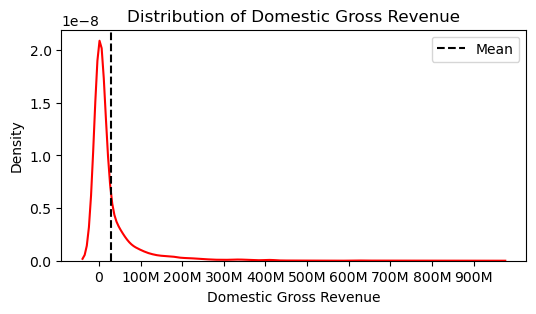

In [26]:
# Creating a KDE plot of domestic gross revenue

plt.figure(figsize=(6, 3))
sns.kdeplot(data=movies_df, x='domestic_gross', color = 'red')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Density')
plt.title('Distribution of Domestic Gross Revenue')
plt.xticks(ticks=[0, 1e8, 2e8, 3e8, 4e8, 5e8, 6e8, 7e8, 8e8, 9e8], 
           labels=['0', '100M', '200M', '300M', '400M', '500M', '600M', '700M', '800M', '900M'])


# Adding a vertical line for the mean

mean_domestic_gross = movies_df['domestic_gross'].mean()
plt.axvline(mean_domestic_gross, color='black', linestyle='--', label='Mean')

plt.legend()

plt.savefig('distribution_domestic_gross.png')
plt.show()

In [27]:
movies_df['domestic_gross'].describe()

count    3.356000e+03
mean     2.877149e+07
std      6.700694e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.795000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

The distribution of domestic gross exhibits a right-skewed pattern, indicating a few movies with exceptionally high revenue and a majority with lower revenue outcomes. The peak density suggests a relatively common range of domestic gross revenue, while the mean revenue of approximately $28.77 million serves as a measure of central tendency. 

### 2. Comparing Genres and Domestic Gross Revenue

In [28]:
# Merging movies_df and basics_df

movies_basics_df = movies_df.merge(basics_df, left_on='title', right_on='primary_title')

movies_basics_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


In [29]:
# Grouping the data by genre and calculating the total worldwide gross revenue

genre_domesticRevenue = movies_basics_df.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False)
top_earning_genres = genre_domesticRevenue.nlargest(10)

top_earning_genres.describe()

count    1.000000e+01
mean     4.628587e+09
std      3.210380e+09
min      1.851798e+09
25%      2.340326e+09
50%      3.775630e+09
75%      4.693120e+09
max      1.102470e+10
Name: domestic_gross, dtype: float64

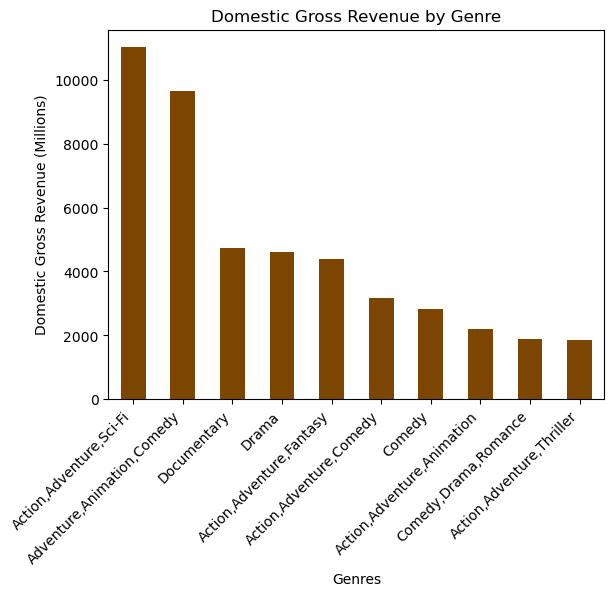

<Figure size 200x100 with 0 Axes>

In [30]:
# Converting the revenue values to millions
top_earning_genres_in_millions = top_earning_genres / 1000000

# Plotting
top_earning_genres_in_millions.plot(kind='bar', color='#7C4600')

plt.xlabel('Genres')
plt.ylabel('Domestic Gross Revenue (Millions)')
plt.title('Domestic Gross Revenue by Genre')
plt.xticks(range(len(top_earning_genres_in_millions)), top_earning_genres_in_millions.index, rotation=45, ha='right')

plt.figure(figsize=(2, 1))

plt.show()



The bar chart illustrates the domestic gross revenue generated by different movie genres, highlighting the genre on the extreme left as the highest earner. The descriptive statistics reveal that the top 10 genres have an average domestic gross revenue of approximately 4.63 billion, with a range between 1.85 billion and 11.02 billion.

### 3. Comparing Genres and Worldwide Gross Revenue

In [31]:
# Merging basics_df and budgets_df

basics_budgets_df = basics_df.merge(budgets_df, left_on='primary_title', right_on='movie')

basics_budgets_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.000000,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000,0,73706
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,86.187247,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,20000000,70433227,122133227
2,tt0326592,The Overnight,The Overnight,2010,88.000000,Documentary,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996
3,tt3844362,The Overnight,The Overnight,2015,79.000000,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000,1109808,1165996
4,tt0337692,On the Road,On the Road,2012,124.000000,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000,720828,9313302


In [32]:
# Grouping the data by genre and calculating the total worldwide gross revenue
genre_revenue = basics_budgets_df.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False)
top_genres = genre_revenue.nlargest(10)

top_genres.describe()


count    1.000000e+01
mean     1.611296e+10
std      1.013717e+10
min      6.095200e+09
25%      7.879781e+09
50%      1.192150e+10
75%      2.359335e+10
max      3.474955e+10
Name: worldwide_gross, dtype: float64

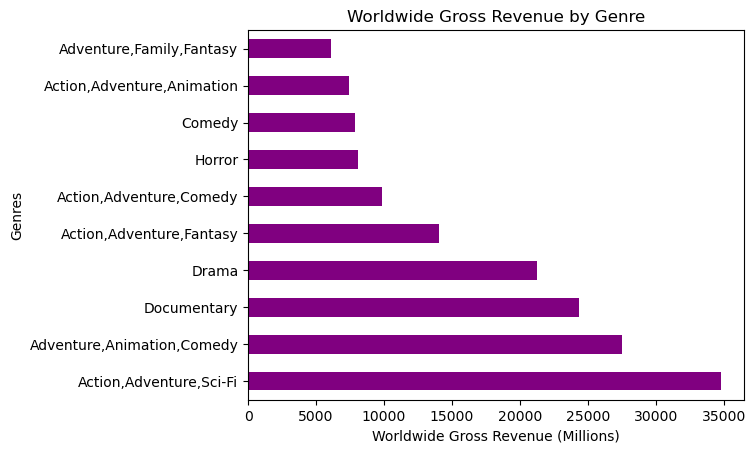

In [35]:
# Plotting

top_genres_in_millions = top_genres / 1000000

top_genres_in_millions.plot(kind='barh', color='#800080')

plt.xlabel('Worldwide Gross Revenue (Millions)')
plt.ylabel('Genres')
plt.title('Worldwide Gross Revenue by Genre')

plt.show()



The horizontal bar chart illustrates the varying revenue performance of different movie genres, emphasizing the genre at the bottom as the most lucrative in terms of worldwide gross revenue. The descriptive statistics reveal that the top 10 genres have an average revenue of around 16.11 billion, with a notable range between 6.10 billion and 34.75 billion. 

### 4. Finding Highest-rated Genres to explore audience perception.

In [36]:
# Merging basics_df and ratings_df

basics_ratings_df = basics_df.merge(ratings_df, on='tconst')

basics_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119


In [37]:
# grouping by genres and finding the average rating

genre_ratings = basics_ratings_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

genre_ratings

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
                             ... 
Crime,Music                   2.4
History,Sci-Fi,Thriller       2.3
Adventure,Crime,Romance       2.3
Adult,Horror                  2.0
Comedy,Musical,Sport          1.4
Name: averagerating, Length: 923, dtype: float64

In [38]:
# Selecting top 10 genres with the highest rating.

top_rated_genres = genre_ratings.nlargest(10)

top_rated_genres

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
History,Sport                  9.2
Music,Mystery                  9.0
Game-Show                      9.0
Drama,Fantasy,War              8.8
Documentary,News,Sport         8.8
Comedy,Drama,Reality-TV        8.8
Drama,Short                    8.8
Documentary,News,Reality-TV    8.8
Name: averagerating, dtype: float64

In [39]:
top_rated_genres.describe()

count    10.000000
mean      8.990000
std       0.233095
min       8.800000
25%       8.800000
50%       8.900000
75%       9.150000
max       9.400000
Name: averagerating, dtype: float64

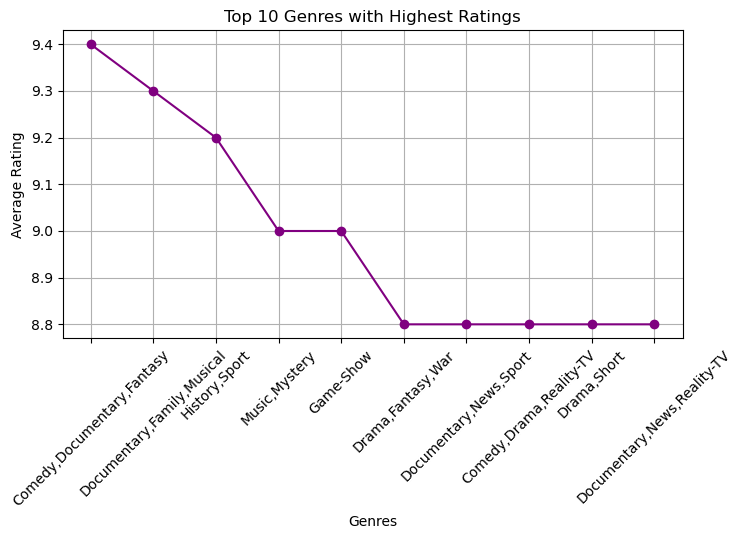

In [40]:
# Plotting

plt.figure(figsize=(8,4))
top_rated_genres.plot(kind='line', marker='o', color='#800080')

plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres with Highest Ratings')

# Adjusting x-axis tick positions and labels
plt.xticks(range(len(top_rated_genres.index)), top_rated_genres.index, rotation=45)

plt.grid(True)
plt.show()


### 5. Comparing release dates and average ratings to explore whether seasons have an impact on audience reception.

In [43]:
# Converting the 'start_year' column on basics_ratings_df to datetime format

basics_ratings_df['start_year'] = pd.to_datetime(basics_ratings_df['start_year'], format='%Y')


# Merging basics_ratings_df and budgets_df on 'primary_title' and 'movie'

combined_df = basics_ratings_df.merge(budgets_df, left_on='primary_title', right_on='movie')


# Converting the 'release_date' column to datetime format

combined_df['release_date'] = pd.to_datetime(combined_df['release_date'])

combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012-01-01,91.000000,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000,0,73706
1,tt0326592,The Overnight,The Overnight,2010-01-01,88.000000,Documentary,7.5,24,21,2015-06-19,The Overnight,200000,1109808,1165996
2,tt3844362,The Overnight,The Overnight,2015-01-01,79.000000,"Comedy,Mystery",6.1,14828,21,2015-06-19,The Overnight,200000,1109808,1165996
3,tt0337692,On the Road,On the Road,2012-01-01,124.000000,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000,720828,9313302
4,tt4339118,On the Road,On the Road,2014-01-01,89.000000,Drama,6.0,6,17,2013-03-22,On the Road,25000000,720828,9313302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016-01-01,86.187247,Drama,9.1,28,65,1995-12-29,Richard III,9200000,2684904,4199334
2871,tt8824064,Heroes,Heroes,2019-01-01,88.000000,Documentary,7.3,7,12,2008-10-24,Heroes,400000,655538,655538
2872,tt8976772,Push,Push,2019-01-01,92.000000,Documentary,7.3,33,70,2009-02-06,Push,38000000,31811527,49678401
2873,tt9024106,Unplanned,Unplanned,2019-01-01,106.000000,"Biography,Drama",6.3,5945,33,2019-03-29,Unplanned,6000000,18107621,18107621


In [44]:
# Extracting the release season from the release date and map to custom labels

season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
combined_df['release_season'] = combined_df['release_date'].dt.month.apply(lambda x: (x % 12 + 3) // 3).map(season_labels)

combined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_season
0,tt0249516,Foodfight!,Foodfight!,2012-01-01,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000,0,73706,Winter
1,tt0326592,The Overnight,The Overnight,2010-01-01,88.0,Documentary,7.5,24,21,2015-06-19,The Overnight,200000,1109808,1165996,Summer
2,tt3844362,The Overnight,The Overnight,2015-01-01,79.0,"Comedy,Mystery",6.1,14828,21,2015-06-19,The Overnight,200000,1109808,1165996,Summer
3,tt0337692,On the Road,On the Road,2012-01-01,124.0,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000,720828,9313302,Spring
4,tt4339118,On the Road,On the Road,2014-01-01,89.0,Drama,6.0,6,17,2013-03-22,On the Road,25000000,720828,9313302,Spring


In [45]:
# Grouping by release season and genre, and calculating the average rating for each group

season_genre_ratings = combined_df.groupby(['release_season', 'genres'])['averagerating'].mean().unstack()

season_genre_ratings

genres,Action,"Action,Adventure","Action,Adventure,Animation","Action,Adventure,Biography","Action,Adventure,Comedy","Action,Adventure,Crime","Action,Adventure,Documentary","Action,Adventure,Drama","Action,Adventure,Family","Action,Adventure,Fantasy",...,"Mystery,Sci-Fi,Thriller","Mystery,Thriller",Romance,"Romance,Sci-Fi,Thriller",Sci-Fi,"Sci-Fi,Thriller",Sport,Thriller,War,Western
release_season,,,,,,,,,,,,,,,,,,,,,
Fall,6.300000,6.35,6.940000,7.1,7.000000,5.70,NaN,5.140000,4.6,6.700000,...,NaN,NaN,6.90,NaN,NaN,NaN,7.9,5.306667,NaN,NaN
Spring,3.500000,NaN,7.500000,NaN,6.071429,5.75,6.5,5.900000,6.7,6.011765,...,7.0,NaN,5.95,7.1,4.233333,6.4,NaN,5.892308,NaN,NaN
Summer,5.480000,NaN,7.766667,6.6,6.341667,6.10,NaN,5.990909,5.1,6.110000,...,7.0,3.2,6.10,NaN,5.000000,NaN,NaN,4.925000,2.8,NaN
Winter,5.218182,NaN,7.633333,7.3,6.212500,6.10,NaN,6.190909,6.0,5.687500,...,5.4,6.9,5.80,NaN,6.700000,4.5,NaN,5.085714,NaN,5.85


In [46]:
# Transposing season_genre_ratings DataFrame

transposed_season_genre_ratings = season_genre_ratings.transpose()

transposed_season_genre_ratings.describe()


release_season,Fall,Spring,Summer,Winter
count,190.000000,176.000000,183.000000,198.000000
mean,6.294936,6.222039,6.168121,6.132829
std,0.950911,0.976196,1.079937,1.077909
min,3.400000,2.200000,2.100000,1.600000
25%,5.705000,5.800000,5.675000,5.500000
50%,6.400000,6.300000,6.300000,6.200000
75%,6.975000,6.800000,6.739286,6.872917
max,8.400000,9.200000,8.700000,8.700000


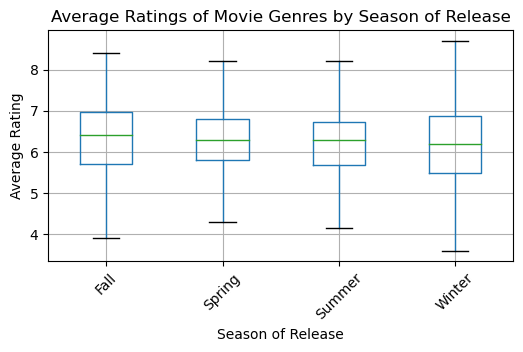

In [47]:
# Creating a box plot to compare the average ratings of different movie genres for each season

plt.figure(figsize=(6,3))
transposed_season_genre_ratings.boxplot(rot=45, showfliers=False)

plt.xlabel('Season of Release')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Movie Genres by Season of Release')

plt.grid(True)

plt.show()


The plot implies that seasons do not have a significant impact on movie ratings.

### 6. Comparing production budget and ratings to explore the relationship between production budget and success of a movie.

In [48]:
combined_df.describe()

,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
count,2875.000000,2875.000000,2.875000e+03,2875.00000,2.875000e+03,2.875000e+03,2.875000e+03
mean,102.258120,6.249217,6.628038e+04,50.94087,3.436427e+07,4.302909e+07,1.029130e+08
std,20.627538,1.185992,1.343077e+05,28.69815,4.774360e+07,7.452513e+07,2.037115e+08
min,3.000000,1.600000,5.000000e+00,1.00000,1.400000e+03,0.000000e+00,0.000000e+00
25%,89.500000,5.600000,1.410000e+02,27.00000,5.000000e+06,5.017520e+05,2.276072e+06
50%,100.000000,6.400000,7.951000e+03,51.00000,1.700000e+07,1.652141e+07,3.006380e+07
75%,113.000000,7.100000,7.508100e+04,76.00000,4.000000e+07,5.186291e+07,1.015694e+08
max,280.000000,9.300000,1.841066e+06,100.00000,4.250000e+08,7.605076e+08,2.776345e+09


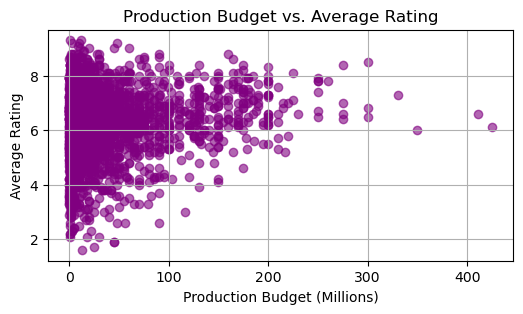

In [50]:
# Converting production_budget to millions

combined_df['production_budget_millions'] = combined_df['production_budget'] / 1000000

# Plotting

plt.figure(figsize=(6, 3))
plt.scatter(combined_df['production_budget_millions'], combined_df['averagerating'], color='#800080', alpha=0.6)

plt.xlabel('Production Budget (Millions)')
plt.ylabel('Average Rating')
plt.title('Production Budget vs. Average Rating')

plt.grid(True)

plt.show()


The scatter plot does not show a clear linear relationship between production budget and average rating. There is no consistent pattern that higher production budgets lead to higher average ratings. 

# Conclusions.

Based on the analysis conducted, here are six key recommendations for Microsoft:

1. **Invest in Adventure, Action, and Sci-Fi Genres:** The data exploration showed that these genres have consistently performed well both in domestic and worldwide gross revenue. Microsoft should consider producing more movies in these genres to capitalize on their popularity and revenue-generating potential.

2. **Explore Comedy, Documentary, and Fantasy Genres:** While Adventure and Action genres perform well financially, Comedy, Documentary, and Fantasy genres received higher average ratings. Microsoft should consider creating a diverse portfolio of movies and allocate resources to produce films in these genres to attract critical acclaim and a loyal fan base.

3. **Focus on High-Quality Content:** Regardless of the genre, it is crucial for Microsoft to prioritize high-quality content. By emphasizing engaging plots, well-developed characters, and top-notch production value, they can increase the likelihood of commercial success and positive audience reception.

4. **Strategic Release Planning:** The analysis didn't indicate a significant impact of seasons on movie ratings. However, Microsoft should still strategically plan the release dates of their movies to avoid direct competition with major blockbusters and leverage seasons or holidays that traditionally have a higher movie-going audience.

5. **Careful Budget Allocation:** While producing high-quality content is essential, Microsoft should also carefully allocate budgets for their movie projects. By analyzing the correlation between production budgets and revenue, they can optimize spending and maximize profitability.

6. **Marketing and Promotion:** In a competitive film industry, effective marketing and promotion are vital. Microsoft should invest in strong advertising campaigns, social media presence, and promotional activities to create buzz around their movies before and after release. Building anticipation can significantly impact opening-weekend box office performance.

7. **Consider Franchise Opportunities:** The analysis showed that certain genres, like Adventure and Sci-Fi, have franchises that perform well. Microsoft could explore opportunities to create successful movie franchises by developing interconnected stories, sequels, or spin-offs, leading to a dedicated fan base and extended revenue streams.

# Next Steps..

The following could yield additional insights to guide operations Microsoft Movie Studio:

1. **Genre-Specific Analysis:** Conduct a deeper analysis of the most popular genres (Adventure, Action, Sci-Fi) to understand the specific elements that contribute to their success. Apply these insights to guide the development of future movies within these genres.

2. **Targeted Audience Surveys:** Conduct surveys or focus groups to gather more detailed information about audience preferences and expectations. Use the feedback to fine-tune movie concepts and marketing approaches.

3. **R&D for New Technologies:** Invest in research and development to integrate new technologies like virtual reality (VR) and augmented reality (AR) in movie experiences. This could attract tech-savvy audiences and provide unique selling points.

4. **Collaborate with Successful Directors:** Identify highly-rated directors with a proven track record in specific genres and initiate collaborations. A director's vision and style can significantly impact a movie's success.

5. **Diversify Original Content:** While sequels and adaptations are popular, allocate resources to create original content. Audiences appreciate fresh and innovative storytelling.